In [1]:
import sys
sys.path.insert(0, '/Users/hinzlehome/codeup-data-science/time-series-exercises/')
from utils.imports import *

from vega_datasets import data


In [2]:
df=data.sf_temps()

In [3]:
df=df.set_index('date')

In [4]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


<AxesSubplot:title={'center':'Avg Daily Temp'}, xlabel='date'>

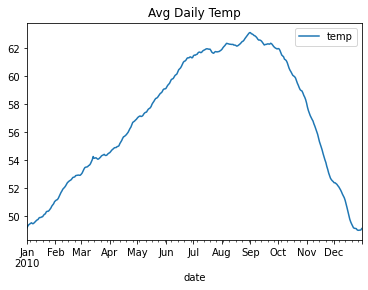

In [5]:
df.resample('d').mean().plot(title='Avg Daily Temp')

<AxesSubplot:title={'center':'Min Daily Temp'}, xlabel='date'>

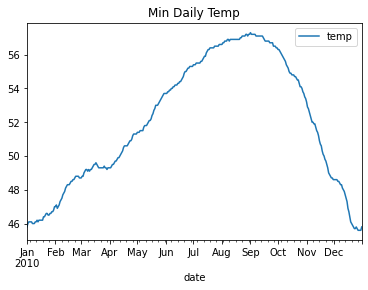

In [6]:
df.resample('D').min().plot(title='Min Daily Temp')

<AxesSubplot:title={'center':'Max Daily Temp'}, xlabel='date'>

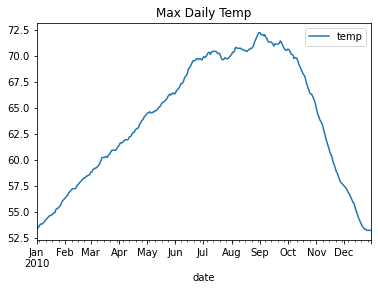

In [8]:
df.resample('D').max().plot(title='Max Daily Temp')

In [10]:
df['month'] = df.index.strftime('%m-%b')

In [11]:
df.groupby('month').temp.mean().sort_values()

month
01-Jan    49.984140
12-Dec    50.498253
02-Feb    52.243899
03-Mar    53.956528
11-Nov    55.185139
04-Apr    55.633056
05-May    57.970968
10-Oct    60.253091
06-Jun    60.444722
07-Jul    61.765457
08-Aug    62.405376
09-Sep    62.487083
Name: temp, dtype: float64

In [12]:
# make a new df with 2 cols: min and max for each day
daily = df.resample('D').temp.agg(['min', 'max'])
# temp fluc
daily['temp_change'] = daily['max'] - daily['min']
# numerate month for sorting
daily['month'] = daily.index.strftime('%m-%b')
# find the max fluc per month
daily.groupby('month').temp_change.max().sort_values().tail()

month
10-Oct    14.4
06-Jun    14.8
07-Jul    14.8
09-Sep    14.9
08-Aug    15.0
Name: temp_change, dtype: float64

<AxesSubplot:xlabel='date'>

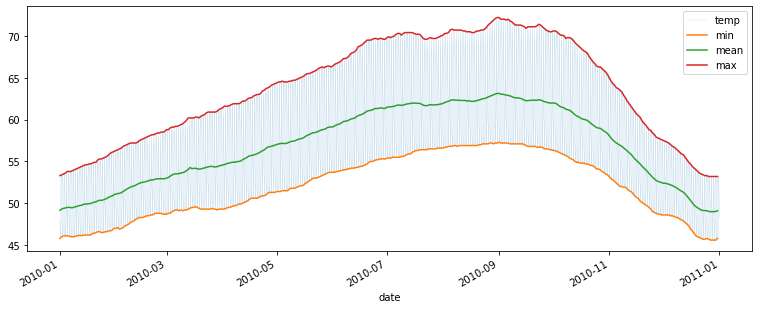

In [13]:
ax = df.plot(alpha=.5, figsize=(13, 5), lw=.2)
df.resample('D').temp.agg(['min', 'mean', 'max']).plot(ax=ax)

<AxesSubplot:xlabel='date', ylabel='value'>

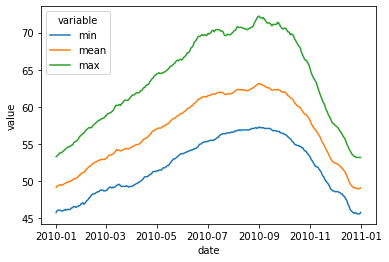

In [14]:
daily = df.resample('D').temp.agg(['min', 'mean', 'max'])
daily = daily.reset_index().melt(id_vars=['date'])
sns.lineplot(data=daily, x='date', y='value', hue='variable')

In [19]:
df=data.seattle_weather()

In [21]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [22]:
df=df.set_index('date')

In [23]:
df.index.strftime('%m-%b')

Index(['01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan',
       '01-Jan', '01-Jan', '01-Jan',
       ...
       '12-Dec', '12-Dec', '12-Dec', '12-Dec', '12-Dec', '12-Dec', '12-Dec',
       '12-Dec', '12-Dec', '12-Dec'],
      dtype='object', name='date', length=1461)

In [24]:
df.index.strftime('%w-%a')

Index(['0-Sun', '1-Mon', '2-Tue', '3-Wed', '4-Thu', '5-Fri', '6-Sat', '0-Sun',
       '1-Mon', '2-Tue',
       ...
       '2-Tue', '3-Wed', '4-Thu', '5-Fri', '6-Sat', '0-Sun', '1-Mon', '2-Tue',
       '3-Wed', '4-Thu'],
      dtype='object', name='date', length=1461)

In [25]:
df['month'] = df.index.strftime('%m-%b')
df['year'] = df.index.year

In [26]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,01-Jan,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,01-Jan,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,01-Jan,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,01-Jan,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,01-Jan,2012


In [27]:
# Highest precipitation
df.resample('M').precipitation.sum().sort_values().tail()

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

<AxesSubplot:title={'center':'Monthly Precipitation'}, xlabel='date'>

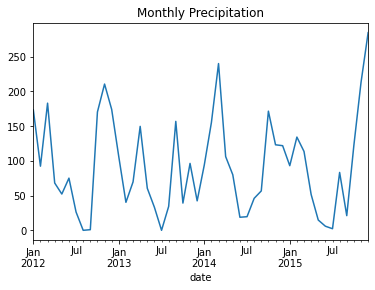

In [28]:
df.resample('M').precipitation.sum().plot(title='Monthly Precipitation')

<AxesSubplot:title={'center':'Biweekly Average Wind'}, xlabel='date'>

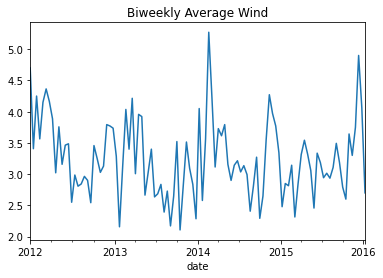

In [29]:
df.resample('2w').wind.mean().plot(title='Biweekly Average Wind')

In [30]:
df['is_sunny'] = df.weather == 'sun'
# NB. previously we did a resample, could also group by date components
df.groupby(['year']).is_sunny.mean().sort_values()

year
2012    0.322404
2015    0.493151
2013    0.561644
2014    0.578082
Name: is_sunny, dtype: float64

In [31]:
df.groupby('month').precipitation.sum().sort_values().tail()

month
01-Jan    466.0
10-Oct    503.4
03-Mar    606.2
12-Dec    622.7
11-Nov    642.5
Name: precipitation, dtype: float64

In [32]:
df['nonzero_precipitation'] = df.precipitation > 0
df.groupby('month').nonzero_precipitation.mean().sort_values().tail()

month
01-Jan    0.532258
03-Mar    0.588710
11-Nov    0.591667
02-Feb    0.646018
12-Dec    0.653226
Name: nonzero_precipitation, dtype: float64

In [33]:
df=data.flights_20k()

In [36]:
df=df.set_index('date')

In [43]:
df.delay=df.delay.clip(lower=0)

In [45]:
df['hour'] = df.index.hour

In [46]:
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [47]:
df.groupby('hour').delay.mean().sort_values().tail()

hour
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

In [48]:
# this the best way to to put the weekedays for sorting purposes
df['weekday'] = df.index.strftime('%w-%a')
df.groupby('weekday').delay.mean().sort_values()

weekday
1-Mon     7.165772
6-Sat     8.431498
2-Tue     9.410866
0-Sun    10.413542
3-Wed    11.032478
4-Thu    12.821322
5-Fri    17.757596
Name: delay, dtype: float64

In [50]:
# DO THIS
df['month'] = df.index.strftime('%m-%b')
df.groupby('month').delay.mean()

month
01-Jan    11.301592
02-Feb    12.306106
03-Mar     9.875287
Name: delay, dtype: float64

In [ ]:
df.head()

In [51]:
df = data.birdstrikes()

In [52]:
df.head()

,Airport__Name,Aircraft__Make_Model,Effect__Amount_of_damage,Flight_Date,Aircraft__Airline_Operator,Origin_State,When__Phase_of_flight,Wildlife__Size,Wildlife__Species,When__Time_of_day,Cost__Other,Cost__Repair,Cost__Total_$,Speed_IAS_in_knots
0,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,1/8/90 0:00,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/9/90 0:00,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0
2,BARKSDALE AIR FORCE BASE ARPT,B-52,None,1/11/90 0:00,MILITARY,Louisiana,Take-off run,Medium,Unknown bird or bat,Day,0,0,0,130.0
3,NEW ORLEANS INTL,B-737-300,Substantial,1/11/90 0:00,SOUTHWEST AIRLINES,Louisiana,Take-off run,Small,Rock pigeon,Day,0,0,0,140.0
4,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/12/90 0:00,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,160.0


In [55]:
df.Effect__Amount_of_damage.value_counts()

None           8939
Minor           549
Substantial     311
Medium          186
C                14
B                 1
Name: Effect__Amount_of_damage, dtype: int64

In [56]:
df.When__Phase_of_flight.value_counts()

Approach        4619
Climb           1956
Take-off run    1592
Landing Roll    1405
Descent          399
Taxi              18
Parked            11
Name: When__Phase_of_flight, dtype: int64